## Stroke Prediction

#### Our top priority in this health problem is to identify patients with a stroke.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

<b>Attribute Information</b>

1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>

### Import libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [102]:
df.shape

(5110, 12)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [104]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [105]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [106]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [107]:
from sklearn.impute import KNNImputer

In [108]:
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [109]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [110]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Exploratory Data Analysis

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

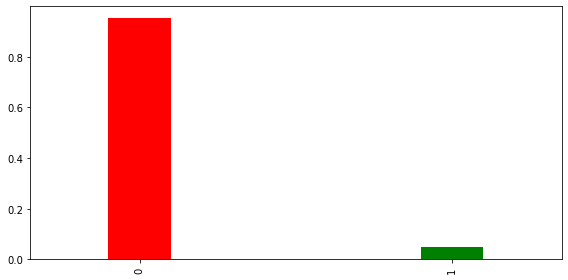

In [111]:
fig, axes = plt.subplots(figsize=(8, 4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [113]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


C:\Users\nikku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

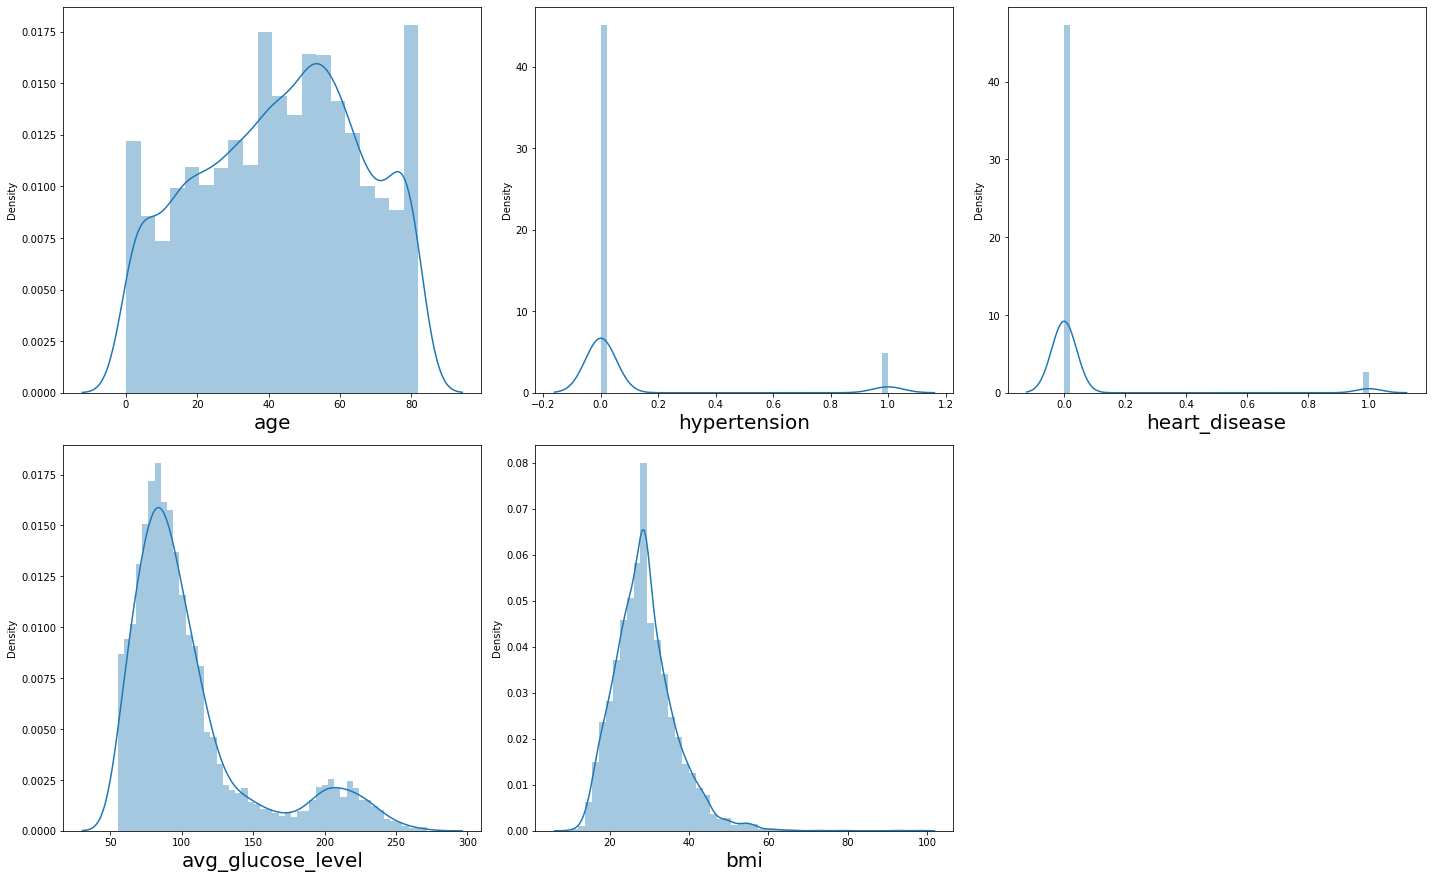

In [114]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikku\anaconda3\lib\si

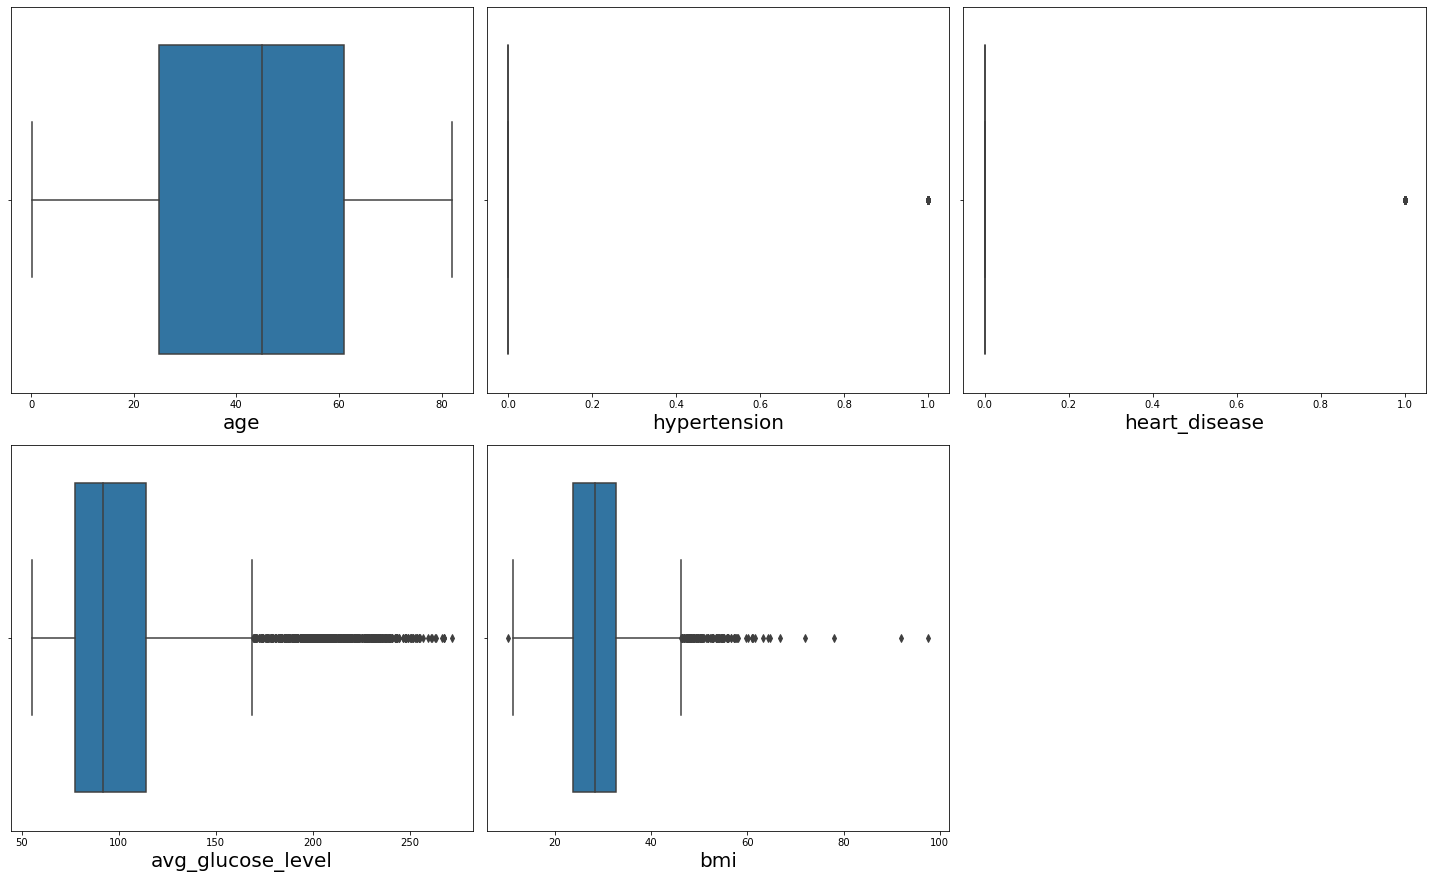

In [115]:
# lets see outliers
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

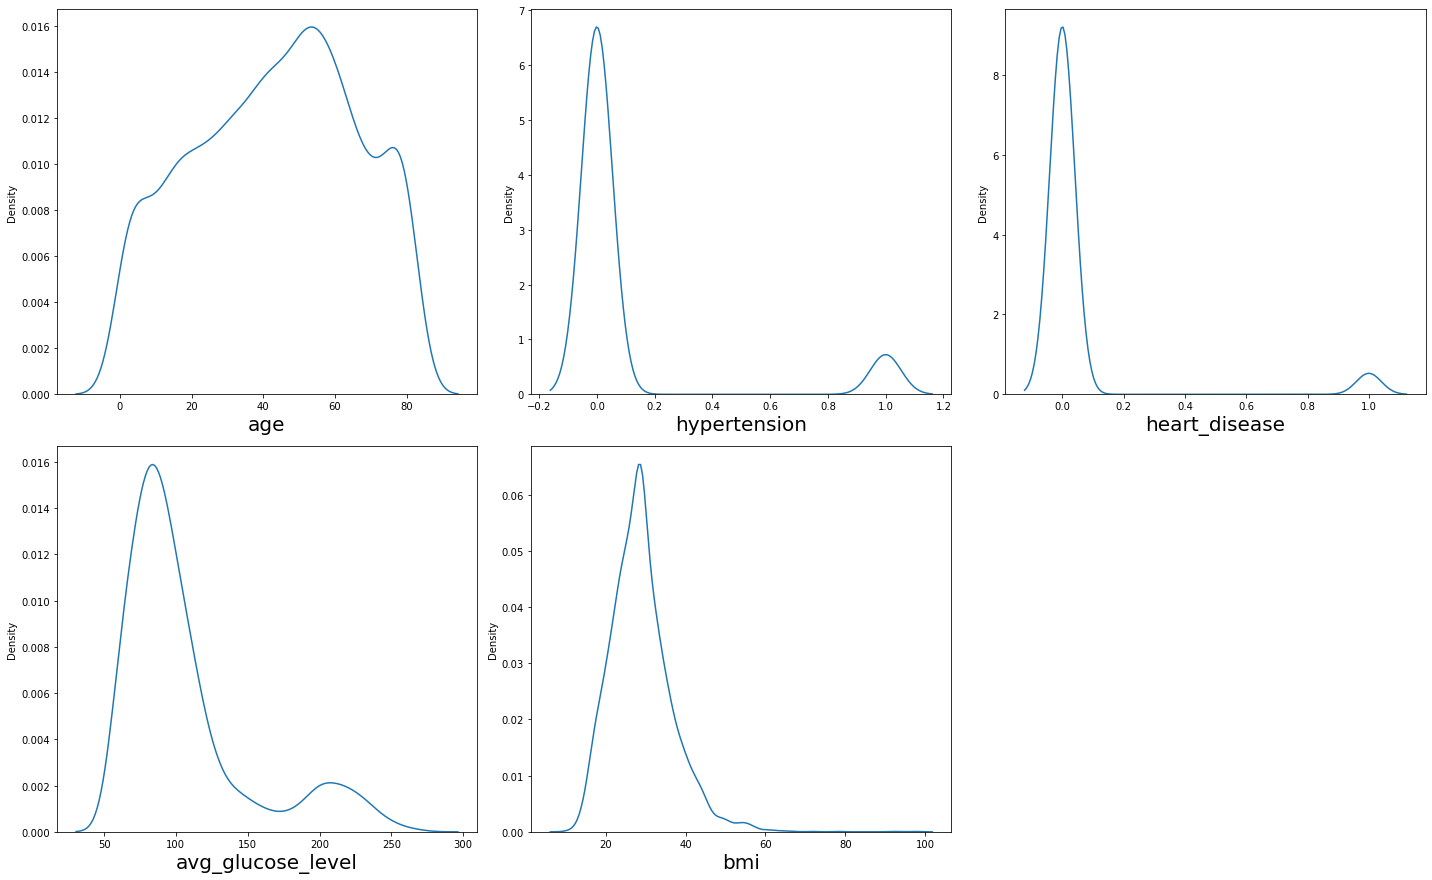

In [116]:

import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.kdeplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [117]:
# categorical columns

In [118]:
df.gender.value_counts(normalize=True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

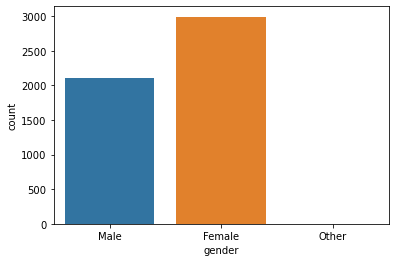

In [119]:
import seaborn as sns
sns.countplot(df['gender'])

In [120]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

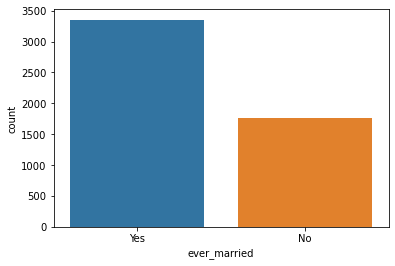

In [121]:
sns.countplot(df['ever_married'])

C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

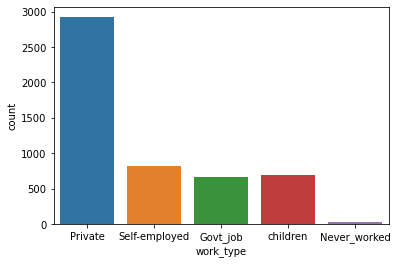

In [122]:
sns.countplot(df['work_type'])

C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

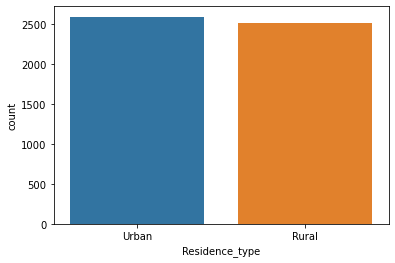

In [123]:
sns.countplot(df['Residence_type'])

C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

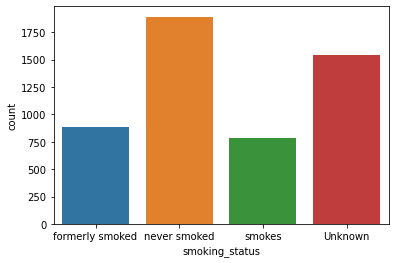

In [124]:
sns.countplot(df['smoking_status'])

In [125]:
# relation between categorical column and target columns

In [126]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikku\anacond

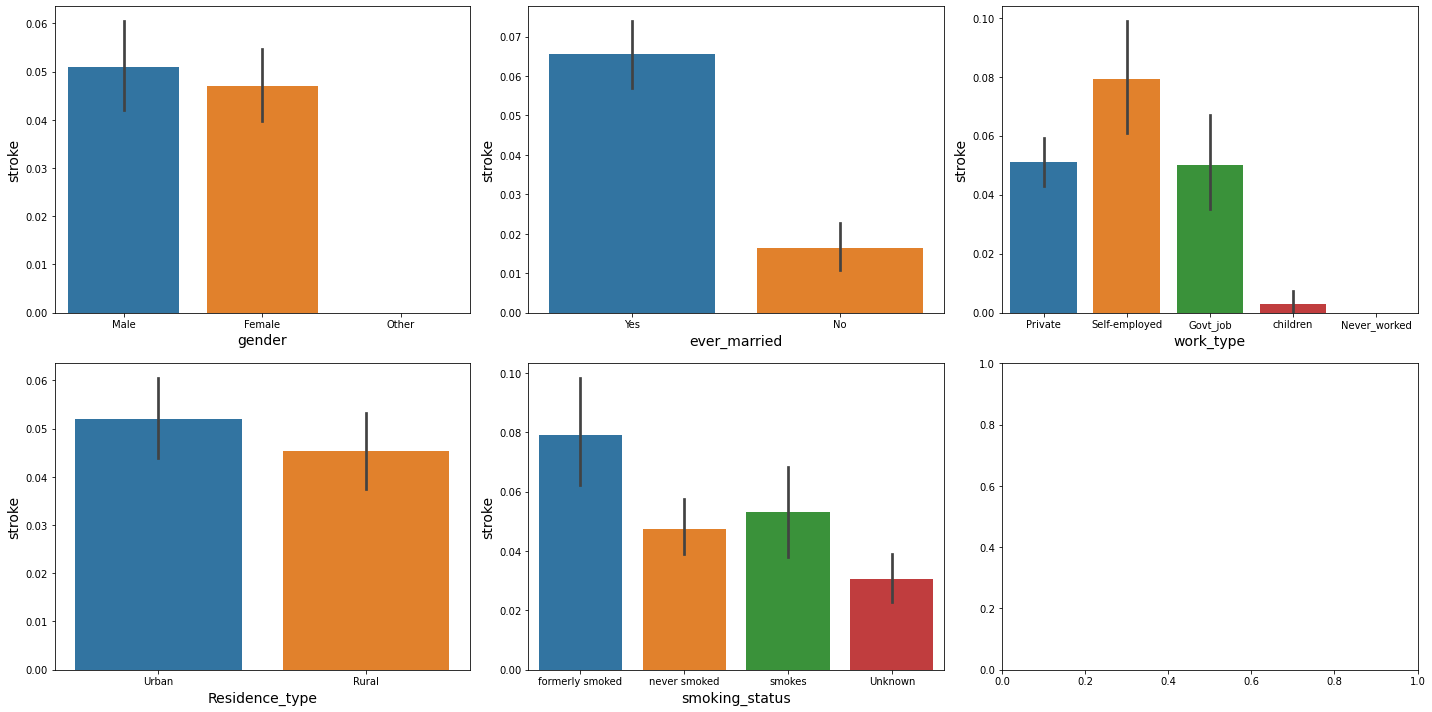

In [127]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(df[c], df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

In [128]:
# pandas profiling
from pandas_profiling import ProfileReport

In [129]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [130]:
profile = ProfileReport(df)
profile.to_file(output_file = "stroke.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 73.31it/s]


### Handle categorical columns

In [131]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [132]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [133]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [135]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [136]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

,gender_Male,gender_Other
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [137]:
married = pd.get_dummies(df[['ever_married']], drop_first= True)
married.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [138]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [139]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [140]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [141]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [142]:
data = pd.concat([df, gender, married, work, residence, smoking], axis = 1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,1,0,0,1,0,0,0,1,0


In [143]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [144]:
data = data.drop(columns="id" , axis=1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [145]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [146]:
# Standardize the numerical features
# from sklearn.preprocessing import StandardScaler
# numerical_feature = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
# scaler = StandardScaler()
# scaler.fit(data[numerical_feature])

# data.loc[:, numerical_feature] = scaler.transform(data[numerical_feature])

In [147]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [148]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 ## **Correalation between features and target**

In [149]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


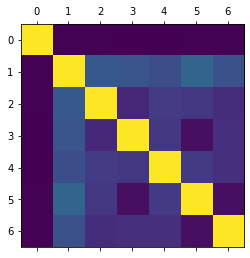

<Figure size 720x432 with 0 Axes>

In [150]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.figure(figsize=(10,6))
plt.show()
# df.corr()

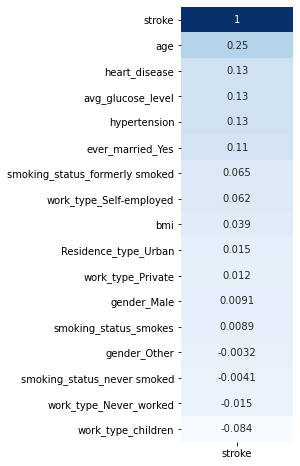

In [151]:
corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

### Split dataset into train and test

In [152]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [153]:
x = data.drop("stroke", axis=1)
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0,0,0,1,0


In [154]:
y = data[['stroke']]
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [156]:
x

array([[ 1.05143428, -0.32860186,  4.18503199, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [157]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.051434,-0.328602,4.185032,2.706375,1.001234e+00,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,2.184951,-0.766774,-0.427313
1,0.786070,-0.328602,-0.238947,2.121559,4.615554e-16,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
2,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
3,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01,-0.840343,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,-0.457676,-0.766774,2.340204
4,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,3.043196,-0.238947,-0.494658,4.615554e-16,-0.840343,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,0.984080,-0.457676,1.304165,-0.427313
5106,1.670617,-0.328602,-0.238947,0.420775,1.442949e+00,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,0.984080,-0.457676,1.304165,-0.427313
5107,-0.363842,-0.328602,-0.238947,-0.511443,2.217363e-01,-0.840343,-0.01399,0.723884,-0.065756,-1.157010,2.288955,-0.394112,-1.016178,-0.457676,1.304165,-0.427313
5108,0.343796,-0.328602,-0.238947,1.328257,-4.278451e-01,1.189990,-0.01399,0.723884,-0.065756,0.864297,-0.436881,-0.394112,-1.016178,2.184951,-0.766774,-0.427313


In [158]:
y.value_counts()

stroke
0         4861
1          249
dtype: int64

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)

In [160]:
y_test.value_counts(normalize=True)

stroke
0         0.951393
1         0.048607
dtype: float64

In [161]:
y_train.value_counts(normalize=True)

stroke
0         0.951212
1         0.048788
dtype: float64

In [162]:
x_train

array([[ 1.09566165, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [-1.07147941, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.13988902, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       ...,
       [-1.20416151, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [ 0.78607007, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [-1.6464352 , -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

### Model training

In [163]:
pip install imbalanced-learn

In [164]:
from imblearn.over_sampling import SMOTE

In [165]:
sm=SMOTE(random_state=42)

In [166]:
x_train_smote,y_train_smote=sm.fit_resample(x_train,y_train)

In [167]:
pd.DataFrame(y_train_smote).value_counts(normalize=True)

stroke
0         0.5
1         0.5
dtype: float64

In [168]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=42)
decision.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [169]:
y_pred = decision.predict(x_test)

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8678126852400712

In [171]:
# accuracy
decision.score(x_test, y_test)

0.8678126852400712

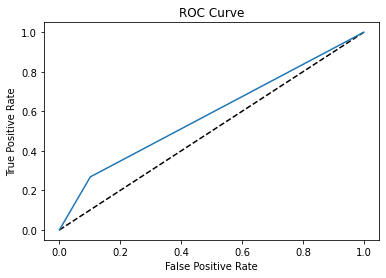

0.5833675252640377

In [172]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred)

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_smote, y_train_smote.values.ravel())

RandomForestClassifier()

In [174]:
# accuracy
rf_model.score(x_test, y_test)

0.9122703023117961

In [175]:
y_pred = rf_model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1525,   80],
       [  68,   14]], dtype=int64)

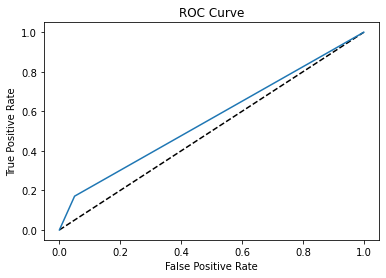

0.5604437352784742

In [176]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred)

In [177]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_smote,y_train_smote.values.ravel())

SVC()

In [178]:
model.score(x_test,y_test)

0.8091286307053942

In [179]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1329,  276],
       [  46,   36]], dtype=int64)

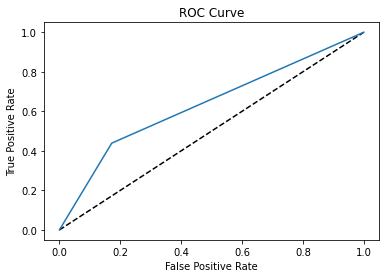

0.6335308867107362

In [180]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred)

In [181]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(x_train_smote,y_train_smote.values.ravel())

KNeighborsClassifier()

In [182]:
y_pred = kc.predict(x_test)

In [183]:
pd.DataFrame(y_pred).value_counts()

0    1394
1     293
dtype: int64

In [184]:
y_test.value_counts()

stroke
0         1605
1           82
dtype: int64

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1340,  265],
       [  54,   28]], dtype=int64)

In [186]:
kc.score(x_test,y_test)

0.8109069353882632

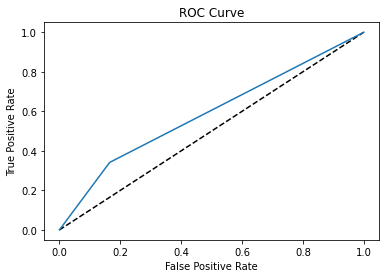

0.5881771901831168

In [187]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred)

In [188]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train_smote,y_train_smote.values.ravel())

LogisticRegression()

In [189]:
lg.score(x_test,y_test)

0.7291049199762892

In [190]:
y_pred = rf_model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1525,   80],
       [  68,   14]], dtype=int64)

In [191]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train_smote, y_train_smote.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.5s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.8s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [192]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [193]:
from sklearn.svm import SVC
model_sv = SVC(C= 10, gamma = 1, kernel = 'rbf')
model_sv.fit(x_train_smote,y_train_smote)

C:\Users\nikku\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=10, gamma=1)

In [194]:
model_sv.score(x_test,y_test)

0.8927089508002372

In [195]:
prep = model_sv.predict(x_test)

In [196]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prep)

array([[1499,  106],
       [  75,    7]], dtype=int64)

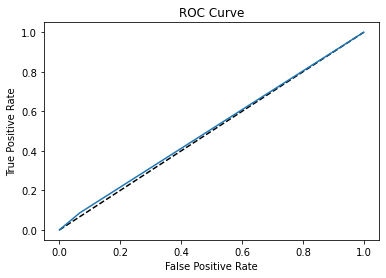

0.5096611199756858

In [197]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, prep)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, prep)

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prep))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1605
           1       0.06      0.09      0.07        82

    accuracy                           0.89      1687
   macro avg       0.51      0.51      0.51      1687
weighted avg       0.91      0.89      0.90      1687



In [199]:
from sklearn.neural_network import MLPClassifier


In [200]:
# save model

In [201]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)

In [202]:
import pickle
with open('model_pickle_rf.pkl','wb') as file:
    pickle.dump(rf_model,file)

In [203]:
import pickle
with open('model_pickle_kc.pkl','wb') as file:
    pickle.dump(kc,file)

In [204]:
import pickle
with open('model_pickle_sv.pkl','wb') as file:
    pickle.dump(model_sv,file)